In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\Board_Infinity\4)BI_Python\BI_Assignment-1\playstore-analysis.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 1. Data clean up – Missing value treatment

In [3]:
# a. Drop records where rating is missing since rating is our target/study variable

In [4]:
data.dropna(subset=['Rating'],inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [5]:
# b. Check the null values for the Android Ver column.
#      i. Are all 3 records having the same problem?
#      ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
#      iii. Replace remaining missing values with the mode

In [6]:
data[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
data.drop(data[data['App']=='Life Made WI-Fi Touchscreen Photo Frame'].index,inplace=True)

In [8]:
data[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [9]:
data['Android Ver'].fillna(data['Android Ver'].mode()[0],inplace=True)

In [10]:
# c. Current ver – replace with most common value

In [11]:
data['Current Ver'].isnull().sum()

4

In [12]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0],inplace =True)

# 2. Data clean up – correcting the data types

In [13]:
# a. Which all variables need to be brought to numeric types?

'Type' column has only 2 values (Paid & Free). This column can be converted into 0 & 1. 0 for Free, 1 for paid.

In [14]:
 # b. Price variable – remove $ sign and convert to float

In [15]:
# removing $ sign
data['Price'] = data['Price'].str.replace(r'$', '')

In [16]:
# converting 'Price' column into float data type
data['Price']=pd.to_numeric(data['Price'], downcast='float')

In [17]:
# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [18]:
data['Installs'] = data['Installs'].str.replace(r'+', '')
data['Installs'] = data['Installs'].str.replace(r',', '')

In [19]:
# Converting 'Installs' columns into int data type
data['Installs']=data['Installs'].astype(int)

In [20]:
# d. Convert all other identified columns to numeric

In [21]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [22]:
FreePaid = {"Type": {"Free": 0, "Paid": 1}}
data=data.replace(FreePaid)

# 3. Sanity checks – check for the following and handle accordingly

In [23]:
# a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.
#  i. Are there any such records? Drop if so.
print('Minimum Rating is:',data['Rating'].min())
print('Maximum Rating is:',data['Rating'].max())
print('Average Rating is:',data['Rating'].mean())
print("There are no records that exceeds the maximum limit that is '5' in the 'Rating' column")

Minimum Rating is: 1.0
Maximum Rating is: 5.0
Average Rating is: 4.191757420456972
There are no records that exceeds the maximum limit that is '5' in the 'Rating' column


In [24]:
# b. Reviews should not be more than installs as only those who installed can review the app. 
#   i. Are there any such records? Drop if so

In [25]:
data['Reviews']=data['Reviews'].astype(int)

In [26]:
#Checking what are the rows having 'Reviews' values > 'Installs' values
data[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,0,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,1,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,1,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,0,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,0,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.00000,10,0,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.00000,1,1,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [27]:
data.drop(data[data['Reviews'] > data['Installs']].index, inplace = True)

# 4. Identify and handle outliers –

In [28]:
# a. Price column
#   i. Make suitable plot to identify outliers in price

In [29]:
sns.set()
sns.set(style="darkgrid")

In [30]:
data=data.dropna(how='any')
data.shape

(9359, 13)

In [31]:
# Droping rows that contains "Price" values == 0
data.drop(data[data['Price'] ==0].index, inplace=True)

In [32]:
data.shape

(644, 13)

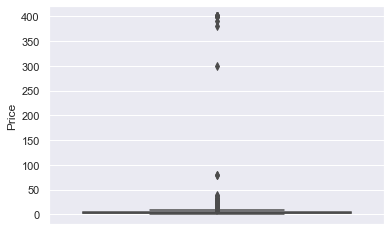

In [33]:
sns.boxplot(y='Price',data=data);

In [34]:
data['Price'].quantile(0.95)

19.989999771118164

As we can see 95% of the 'Price' values are below 20. So any value aboue 20 is considered to be an outlier.

In [35]:
# ii. Do you expect apps on the play store to cost $200? Check out these cases

In [36]:
data[data['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,1,399.98999,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,1,399.98999,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,1,400.00000,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,1,399.98999,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,1,399.98999,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,1,299.98999,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,1,399.98999,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,1,379.98999,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,1,399.98999,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,1,399.98999,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


'''Yes I expect some of the apps that costs >=$200 as they come under FAMILY, FINANCE, LIFESTYLE category
and many people have installed it.'''

In [37]:
# iii. After dropping the useless records, make the suitable plot again to identify outliers
# iv. Limit data to records with price < $30

In [38]:
data.drop(data[data['Price'] >30].index, inplace=True)

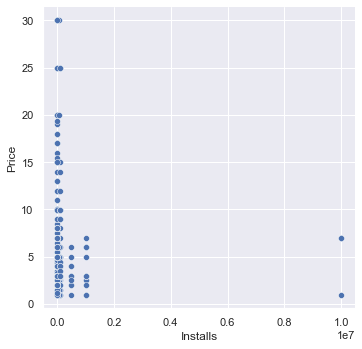

In [39]:
sns.relplot(x="Installs", y="Price", data=data, kind="scatter");

In [40]:
# b. Reviews column
#  i. Make suitable plot
#  ii. Limit data to apps with < 1 Million reviews

In [41]:
data.drop(data[data['Reviews']>=1000001].index, inplace=True)

In [42]:
data['Reviews'].describe()

count       621.000000
mean       7352.731079
std       28273.722155
min           1.000000
25%          33.000000
50%         216.000000
75%        2460.000000
max      408292.000000
Name: Reviews, dtype: float64

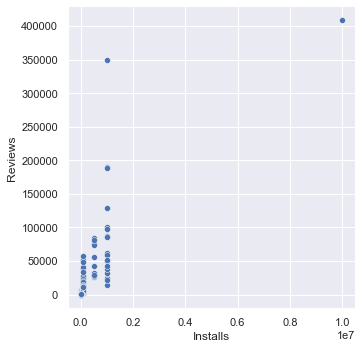

In [43]:
sns.relplot(x="Installs", y="Reviews", data=data, kind="scatter");

In [44]:
# c. Installs
#  i. What is the 95th percentile of the installs?
#  ii. Drop records having a value more than the 95th percentile

In [45]:
Ninty_fifth_percentile=data['Installs'].quantile(0.95)
Ninty_fifth_percentile

500000.0

In [46]:
data.drop(data[data['Installs']>Ninty_fifth_percentile].index, inplace=True)

# Data analysis to answer business questions

In [47]:
#5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
#   a. How do you explain this?
#   b. What is the implication of this on your analysis?

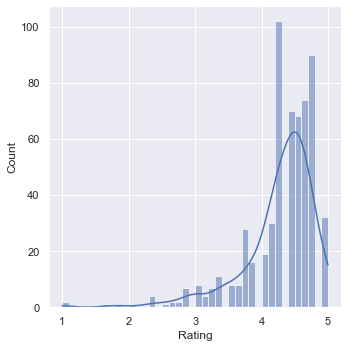

In [48]:
sns.displot(x = 'Rating', data = data, bins=40, kde = True); #hisplot

From this histogram, we can see that the Rating values are left skewed. More skewness is towards lower Rating value. Most of the people gave Rating value from
4.1-4.8.

In [49]:
# 6. What are the top Content Rating values?
#  a. Are there any values with very few records?
#  b. If yes, drop those as they won’t help in the analysis

In [50]:
data.groupby(['Content Rating'])['Content Rating'].count().sort_values(ascending=False)

Content Rating
Everyone        512
Teen             41
Everyone 10+     28
Mature 17+       15
Name: Content Rating, dtype: int64

The top "Content Rating" values are from Everyone. There are only 15 Mature 17+ records are there, so we can drop them

In [51]:
data.drop(data[data['Content Rating']=='Mature 17+'].index, inplace=True)

In [52]:
# 7. Effect of size on rating
#  a. Make a joinplot to understand the effect of size on rating
#  b. Do you see any patterns?
#  c. How do you explain the pattern?

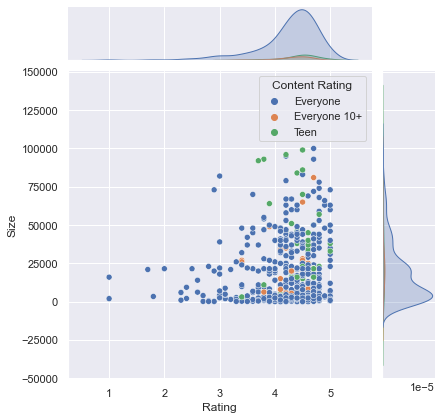

In [53]:
sns.jointplot(x='Rating',y='Size',data=data,hue='Content Rating',kind='scatter');

Yes, I could see a pattern from this plot. If Rating increases, number of people slightly increases. Most of the teenage people gave ratings between 4 to 4.7. Almost everyone gave rating value between 3.5 to 4.7 for all apps.

In [54]:
#8. Effect of price on rating
#   a. Make a jointplot (with regression line)
#   b. What pattern do you see?
#   c. How do you explain the pattern?
#   d. Replot the data, this time with only records with price > 0
#   e. Does the pattern change?
#   f. What is your overall inference on the effect of price on the rating

In [55]:
data=pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\Board_Infinity\4)BI_Python\BI_Assignment-1\playstore-analysis.csv')

In [56]:
data['Price'] = data['Price'].str.replace(r'$', '')

In [57]:
data.drop(data[data['App']=='Life Made WI-Fi Touchscreen Photo Frame'].index,inplace=True)
data['Price']=pd.to_numeric(data['Price'], downcast='float')

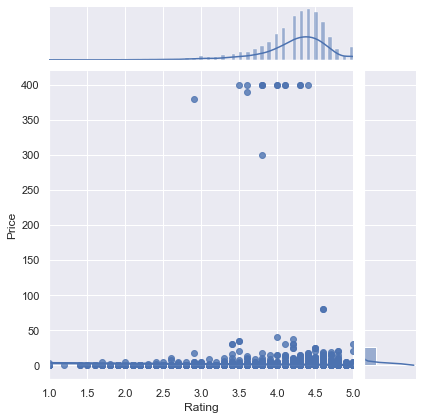

In [58]:
sns.jointplot(x='Rating',y='Price',data=data,kind='reg');

The pattern is, if the Price decreases, the number of Rating increases.

In [59]:
data.drop(data[data['Price'] ==0].index, inplace=True)

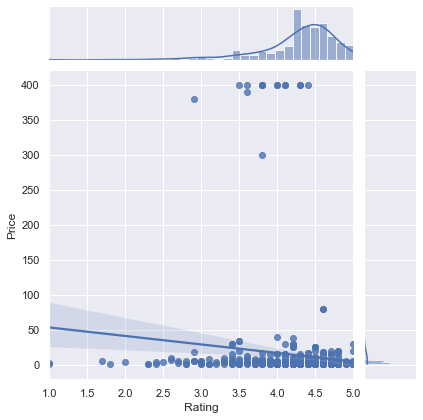

In [60]:
sns.jointplot(x='Rating',y='Price',data=data,kind='reg');

The pattern is not changing. As the price value decreases the Rating value increases. The overall inference is more number of people bought apps which are lesser in price and they gave good Ratings.

In [61]:
# 9. Look at all the numeric interactions together –
#    a. Make a pairplort with the columns - 'Reviews', 'Size', 'Rating', 'Price'

In [62]:
data['Installs'] = data['Installs'].str.replace(r'+', '')
data['Installs'] = data['Installs'].str.replace(r',', '')
data['Installs']=data['Installs'].astype(int)

In [63]:
data['Reviews']=data['Reviews'].astype(int)
data.drop(data[data['Reviews'] > data['Installs']].index, inplace = True)

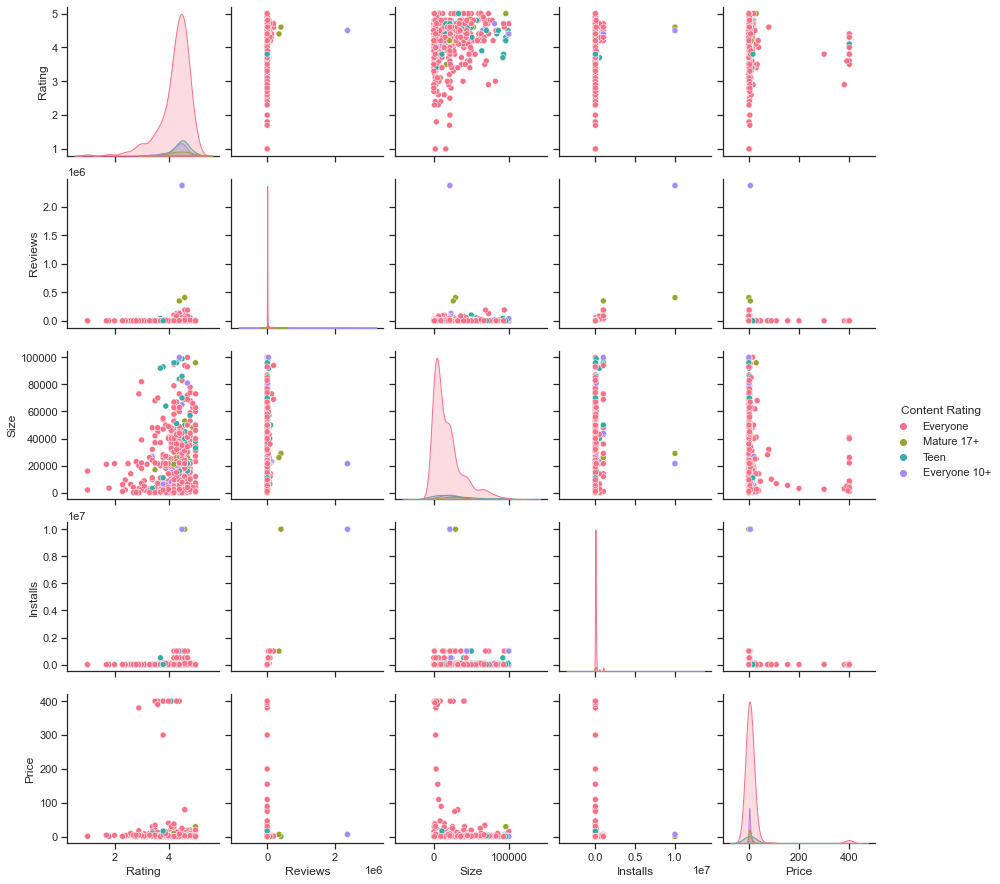

In [64]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue='Content Rating', height=2.5, palette="husl")

In [65]:
#10. Rating vs. content rating
#   a. Make a bar plot displaying the rating for each content rating
#   b. Which metric would you use? Mean? Median? Some other quantile?
#   c. Choose the right metric and plot

In [66]:
data.dropna(subset=['Rating'],inplace=True)
data[['Rating','Content Rating']]

,Rating,Content Rating
234,4.7,Everyone
235,4.8,Everyone
290,4.7,Everyone
291,4.8,Everyone
427,4.0,Everyone
...,...,...
10682,4.3,Everyone
10690,5.0,Everyone
10760,4.4,Everyone
10782,3.8,Teen


<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

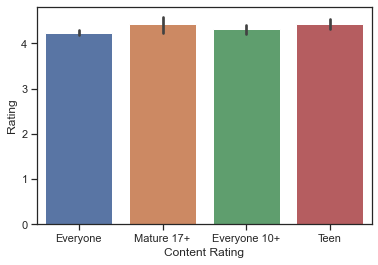

In [67]:
sns.barplot(x="Content Rating", y="Rating", data=data)

Mean is the suitable metric

In [68]:
#11. Content rating vs. size vs. rating – 3 variables at a time
#    a. Create 5 buckets (20% records in each) based on Size
#    b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination
#    c. Make a heatmap of this
#       i. Annotated
#       ii. Greens color map
#    d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [69]:
b=[0,20000,40000,60000,80000,100000]
data['Bucket Size']=pd.cut(data['Size'],b,labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data,values='Rating',index='Bucket Size',columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.188957,4.323077,3.500000,4.405263
20k-40k,4.309722,4.313333,4.454545,4.688889
40k-60k,4.312245,4.100000,4.425000,4.514286
60k-80k,4.365217,4.500000,NaN,4.200000
80k-100k,4.314286,4.550000,5.000000,4.225000


In [70]:
data1=pd.pivot_table(data,values='Rating',index='Bucket Size',columns='Content Rating',aggfunc=lambda x:np.quantile(x,0.2))

In [71]:
data1

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.90,4.14,3.5,4.16
20k-40k,4.10,4.18,4.2,4.56
40k-60k,4.00,3.98,4.1,4.32
60k-80k,4.20,4.50,NaN,4.02
80k-100k,4.26,4.46,5.0,3.96


<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

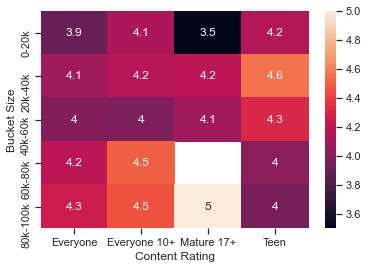

In [72]:
sns.heatmap(data1,annot=True)

<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

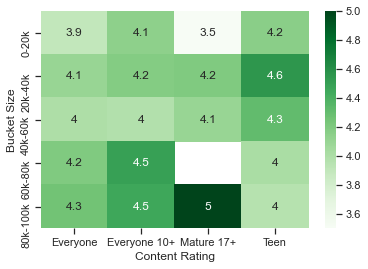

In [73]:
sns.heatmap(data1,cmap='Greens',annot=True)

Lighter apps are not preferred in all categories. Apps in 40k-60k and 80k-100k have high ratings in all categories. So, heavier apps are preferred in all categories.